In [257]:
%matplotlib inline
import scipy
import sympy
from modsim import *
import numpy as np
# Average statistics.
# Grams of ethanol consumed.
alcohol_consumed = 30
# Absorption rate constant. 3.18 is mean blood value.
k = 3.18
# BAC. .04 is the legal driving limit, though you should never drink and drive!
BAC = .04 
# Elimination rate constant. .163 is mean blood value.
beta = .163
# Body fat ratio. .67 for women, .73 men.
ratio = .73
# Weight.
weight = 70
# Liters of blood in human body
blood_amount = 5
#


class simplistic_model():
    """
    One-compartment model for alcohol absorption and elimination.
    """
    def __init__(self):
        """
        Constructor.
        """
        pass
    @staticmethod   
    def absorb_alcohol(d, t, w=weight):
        """
        Returns the amount of alcohol absorbed.
        """
        return ((d * (1-np.exp(-k*t)))/(ratio*w))
    
    @staticmethod   
    def eliminate_alcohol(t):
        """
        Returns the amount of alcohol eliminated
        """
        return beta * t

    @staticmethod   
    def model_alcohol_processing(d, t):
        """
        Simulates alcohol processing with a timeseries.
        TODO this is currently untested but pushing anyways.
        h = number of hours.
        d = dosage in grams of ethanol.
        """
        result = TimeSeries()
        for h in linrange(0, t):
            result[h] = (simplistic_model.absorb_alcohol(d, (h)) - simplistic_model.eliminate_alcohol((h)))/blood_amount
            if result[h] <= 0:
                result[h] = 0
        return result
    
    @staticmethod
    def model_processing_after_eating(d, t, time_of_eating, initial_weight, weight_gain, time_of_eating_2, weight_gain_2, food_2 = None):
        """
        Simulates alcohol processing and factors in weight gain as well.
        d = dosage in hours
        If food_2 is None, then simulation will run from 0 to time_of_eating to t. Else, it should run from 0 to time_of_eating to time_of_eating_2 to t
        """
        

        if food_2 is None:
            result = TimeSeries()
            for i in linrange(0, time_of_eating):
                result[i] = (simplistic_model.absorb_alcohol(d, (i), initial_weight) - simplistic_model.eliminate_alcohol((i)))/blood_amount
                if result[i] <= 0:
                    result[i] = 0
            for j in linrange(time_of_eating, t):
                result[j] = (simplistic_model.absorb_alcohol(d, (j), (initial_weight + weight_gain)) - simplistic_model.eliminate_alcohol((j)))/blood_amount
                if result[j] <= 0:
                    result[j] = 0
            return result
        else:
            result = TimeSeries()
            for i in linrange(0, time_of_eating):
                result[i] = (simplistic_model.absorb_alcohol(d, (i), initial_weight) - simplistic_model.eliminate_alcohol((i)))/blood_amount
                if result[i] <= 0:
                    result[i] = 0
            for j in linrange(time_of_eating, time_of_eating_2):
                result[j] = (simplistic_model.absorb_alcohol(d, (j), (initial_weight + weight_gain)) - simplistic_model.eliminate_alcohol((j)))/blood_amount
                if result[j] <= 0:
                    result[j] = 0
            for h in linrange(time_of_eating_2, t):
                result[h] = (simplistic_model.absorb_alcohol(d, (h), (initial_weight + weight_gain + weight_gain_2)) - simplistic_model.eliminate_alcohol((h)))/blood_amount
                if result[h] <= 0:
                    result[h] = 0
            return result
        
    @staticmethod   
    def weight_based_on_bac(t, input_BAC):
        """
        Returns the weight of the individual based on static BAC and time.
        """
        return (alcohol_consumed*(1-np.exp(-k*t)))/((input_BAC + beta*t)*ratio)
    
    @staticmethod   
    def BAC_based_on_weight(t, input_weight):
        """
        Returns the BAC of the individual based on static weight and time.
        """
    
        return ((alcohol_consumed*(1-np.exp(-k*t))/(ratio*input_weight)) - beta*t)
        

class three_compartment_model():
    """
    Three-compartment model for alcohol absorption and
    """
    def __init__():
        """
        Constructor.
        """
        pass
    @staticmethod
    
    def model_alcohol_processing(d, t):
        return three_compartment_model.stomach_processing(d, t) - three_compartment_model.small_intestine_processing(d, t)
    
    @staticmethod
    def gastric_emptying(d, t):
        """
        Models alcohol processing in the stomach.
        """
        return ((-7.05)/((1 + (.42*(d/.470)**2)*t)))
   
    def stomach_processing_slope(c):
        return ((-5.07*c)/(1.00 + (0.42*c)**2))

    @staticmethod
    def stomach_processing(c, t):
        """
        Models alcohol processing in the stomach.
        """
        stomach_eq = TimeSeries()
        newest_c = c
        for h in linrange(0, t):
            stomach_eq[h] = (abs(newest_c - abs(((three_compartment_model.stomach_processing_slope(newest_c))))))/blood_amount
            if stomach_eq[h] < 0:
                stomach_eq[h] = 0
            newest_c = abs((three_compartment_model.stomach_processing_slope(newest_c)))
        return stomach_eq
    @staticmethod
    def small_intestine_slope(c):
        return ((5.07*c)/(1.00 + (0.42*c)**2))/c
    @staticmethod
    def small_intestine_processing(c, t):
        si_eq = TimeSeries()
        newest_c = c
        for h in linrange(0, t):
            si_eq[h] = abs(newest_c - (((three_compartment_model.small_intestine_slope(newest_c)))))/blood_amount
            if si_eq[h] < 0:
                si_eq[h] = 0
            newest_c = abs((three_compartment_model.small_intestine_slope(newest_c)))
        return si_eq
    
    @staticmethod
    def lean_body_mass_processing(d, t):
        pass
    


0    -0.890059
1    -0.371003
2    -0.091224
3    -0.303988
4    -0.391761
5    -0.445834
6    -0.461254
7    -0.473820
8    -0.468893
9    -0.467813
10   -0.458018
11   -0.453103
12   -0.443262
13   -0.437837
14   -0.429244
15   -0.424311
dtype: float64


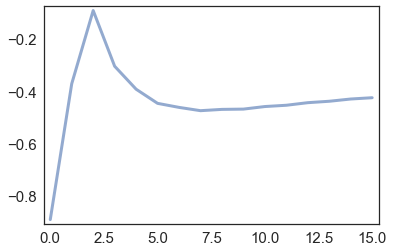

In [262]:
result = (three_compartment_model.model_alcohol_processing(.12, 15))
print(result)
for element in result:
    if element < 0:
        element = 0
plot(result)


# plot(three_compartment_model.model_alcohol_processing(.08, 15))
# plot(three_compartment_model.stomach_processing(.33, 15))
# model_processing_after_eating params d, t, time_of_eating, initial_weight, weight_gain, time_of_eating_2, weight_gain_2, food_2 = None